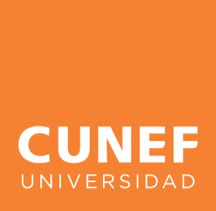
#  <font color=orange> Notebook: Shallow Learning en Series Temporales</font>
## Máster de Ciencia de Datos
### Modelos de Inteligencia Artificial

<b> Profesor: </b> Wolfram Rozas. <b> Departamento: </b> Métodos Cuantitativos
___________________________________________________________________________________________
__Resumen__


En este notebook se muestran una serie de conceptos básicos de Deep Learning en Python con Pytorch.
___________________________________________________________________________________________

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline 

# Tensores

Los tensores constituyen el elemento base de Pytorch y aportan gran parte de su funcionalidad y potencia. En la práctica, son elementos equivalentes a arrays de _numpy_ con la adición de:
 - Capacidad de almacenarlos y operar con ellos indistintamente en CPU y GPU.
 - Seguimiento automático de las operaciones realizadas para el cálculo automático de derivadas.
 
## Operaciones básicas

Un tensor se define de la misma forma que un array de *numpy*:

In [2]:
t1 = torch.tensor([0,1,2,8,1]) # definimos un vector con elementos [0,1,2,2,1]
print(t1)
print(type(t1))
print(t1.dtype)

tensor([0, 1, 2, 8, 1])
<class 'torch.Tensor'>
torch.int64


y se puede indexar y operar de la misma forma que un array de *numpy*:

In [3]:
t1[3] # devuelve un tensor que contiene solo el 4º elemento

tensor(8)

In [4]:
t1*2 - 3 # multiplica t1 por 2 y le resta 3

tensor([-3, -1,  1, 13, -1])

Podemos especificar el tipo de datos que contiene el tensor. Los mas utilizados son _float_ (número con decimales de 32 bits) y _long_ (número entero de 64 bit). 

In [5]:
torch.tensor([31231,1,42], dtype=torch.long)

tensor([31231,     1,    42])

In [6]:
torch.tensor([31231,1,42], dtype=torch.float)

tensor([3.1231e+04, 1.0000e+00, 4.2000e+01])

Nota: el tipo habitual en python (y numpy) para números con decimales es el _float_ de 64 bits. Su equivalente en Pytorch es _double_ (o float64), pero lo habitual es convertir los datos al _float_ de Pytorch (de 32 bits) porque las operaciones en las GPUs suelen ser mucho mas rápidas con *float32*, y las variables ocupan menos memoria.

## Operaciones en CPU y GPU

Un tensor puede existir en un _device_. Un _device_ es una CPU o GPU concreta de nuestro sistema. En la mayoría de los casos, en los sistemas personales solo hay una CPU, y a veces una GPU, y las opciones suelen reducirse a "almacenar tensor en CPU" o "almacenar tensor en GPU".

El fabricante NVIDIA desarrolló __CUDA (Compute Unified Device Architecture)__. Es una plataforma de computación paralela y una interfaz de programación de aplicaciones (API) que permite que el software utilice ciertos tipos de unidad de procesamiento de gráficos (GPU) para procesamiento de propósito general, un enfoque llamado computación de propósito general en GPU (GPGPU). CUDA es una capa de software que brinda acceso directo al conjunto de instrucciones virtuales de la GPU y elementos computacionales paralelos, para la ejecución de núcleos de cómputo.

La unidad de procesamiento de gráficos (GPU), como procesador especializado, aborda areas de computación intensiva de gráficos 3D de alta resolución en tiempo real. En 2012, las GPU se habían convertido en sistemas multinúcleo altamente paralelos que permitían una manipulación muy eficiente de grandes bloques de datos. Este diseño es más efectivo que la unidad central de procesamiento (CPU) de propósito general para algoritmos en situaciones en las que el procesamiento de grandes bloques de datos se realiza en paralelo, como Deep Learning.

![alt text](CPU-GPU_devices.png)

In [7]:
torch.device("cpu:0") # cpu número 0

device(type='cpu', index=0)

In [8]:
torch.device("cuda:0") # gpu número 0

device(type='cuda', index=0)

Se puede especificar 'cpu' o 'cuda' sin número para coger la CPU/GPU por defecto del sistema. 

In [9]:
torch.device("cuda")

device(type='cuda')

In [10]:
torch.cuda.is_available()

False

Por defecto, los tensores se definen en la CPU, pero se puede especificar el _device_ de la siguiente manera:

In [11]:
t2_cpu = torch.tensor([-2, 4, 2, 0, 1.123], device='cpu')
#t3_gpu = torch.tensor([-1, 24, -2, 0.1, -15], device='cuda') SOLO si esta presente 

In [12]:
t2_cpu

tensor([-2.0000,  4.0000,  2.0000,  0.0000,  1.1230])

In [13]:
t3_gpu = torch.tensor([-1, 24, -2, 0.1, -15], device='cpu')

In [14]:
t3_gpu

tensor([ -1.0000,  24.0000,  -2.0000,   0.1000, -15.0000])

No podemos operar con tensores almacenados en distintos *devices*:

In [15]:
t2_cpu + t3_gpu # Esta operación produce un error (mezclamos operaciones en CPU y GPU)

tensor([ -3.0000,  28.0000,   0.0000,   0.1000, -13.8770])

Podemos mover tensores entre _devices_ (pero cuidado: eso mueve físicamente los valores entre las memorias de los _devices_ y es una operación lenta).

In [16]:
t3_gpu.dtype

torch.float32

In [17]:
t2_cpu + t3_gpu.to('cpu') # Esta operación se realiza en la CPU

tensor([ -3.0000,  28.0000,   0.0000,   0.1000, -13.8770])

In [18]:
t2_cpu.to('cuda') + t3_gpu # # Esta operación se realiza en la GPU

AssertionError: Torch not compiled with CUDA enabled

En la práctica se suele establecer una variable _device_ al inicio del código para especificar dónde se realizan las operaciones, para poder cambiarlo facilmente.

In [ ]:
# Este código fallará si la máquina no tiene GPUs

dev = torch.device('cpu')
print(dev)
t4 = torch.tensor([0,0,0,0,1], device=dev)
dev2 = torch.device('cuda')
print(dev2)
t42 = torch.tensor([0,0,0,0,1], device=dev2)

## Interacción con _Numpy_

Se puede definir un tensor directamente a partir de un array *numpy*, y obtener un *array* numpy a partir de un tensor. En particular, estas operaciones no suponen la copia de los datos (siempre que no se modifique el 'dtype'), con lo que se pueden 'ver' los datos como si fuera un objeto *numpy* de cara al resto de librerías que utilizan *numpy*, y ver los datos como tensor para las operaciones en Pytorch.

Para generar un tensor a partir de un _numpy_ hay principalmente dos maneras de hacerlo. La forma mas directa (sin copia de datos) es con *torch.from_numpy*:

In [ ]:
np1 = np.array([-2, 4, 2, 0, 1.123])
np1.dtype # float64
np1

In [ ]:
torch.from_numpy(np1) # conserva el dtype: tensor float64

Sin embargo, la mayoría de las veces queremos utilizar tensores *float32*, y podemos hacerlo creando un tensor y forzando el _dtype_ (esto _sí_ copia los datos):

In [ ]:
t_np = torch.tensor(np1, dtype=torch.float)
print(t_np)
print(t_np.dtype)

Para 'ver' los datos de un tensor como un _numpy_, simplemente usamos _.numpy()_:

In [ ]:
t_np.numpy()

# Derivadas

La segunda característica importante de los tensores de Pytorch es que permiten calcular derivadas con respecto a ellos de cualquier cantidad calculada a partir de ellos. 

La derivada de una función con respecto a una variable que intervenga en su cálculo nos da una idea de cómo cambia la función al modificar 'ligeramente' dicha variable. Por ejemplo, si la derivada de $f(x)$ con respecto a $x$ es $-3$, significa que si aumentamos $x$ en $0.1$ el valor de $f$ cambiará (aprox.) en $-0.3$ (es decir, disminuirá).

La capacidad para estimar estas derivadas de forma automática y eficiente (y en GPUs) es, como veremos mas adelante, lo que ha permitido el desarrollo del Deep Learning moderno.

## Obtención de derivadas - Método de Propagación hacia atrás (*Backpropagation*)

Para mostrar el funcionamiento de forma mas intuitiva vamos a obtener la derivada de estas funciones sencillas:

 - $f(x) = 3x^2 + 2x - 3$:
     - $f_x(x) = 6x + 2$
     
     
 - $g(x,y,z) = 5 x y + 3x^2 + 2y - y z$:
     - $g_x(x,y,z) = 5y + 6x$
     - $g_y(x,y,z) = 5x + 2 - z$

Definimos las funciones en Python

In [ ]:
def f(x):
    return 3*x*x + 2*x - 3
def g(x,y,z):
    return 5*x*y + 3*x*x + 2*y - y*z

Creamos los valores de *x e y* donde queremos evaluar nuestras derivadas. 

Podemos especificar si querremos obtener derivadas con respecto a un tensor en particular a la hora de crearlo (en este caso sí queremos conocer las de *x e y*):

In [ ]:
t_x = torch.tensor(2, dtype=torch.float, requires_grad=True) # con derivada
t_y = torch.tensor(-1, dtype=torch.float, requires_grad=True) # con derivada
t_z = torch.tensor(3, dtype=torch.float, requires_grad=False) # sin derivada
# requires_grad = True – If autograd should record operations on the returned tensor.  
# Default: False.

In [ ]:
t_x

Nota: por defecto __requires_grad=False__, ya que acumular las derivadas de los tensores consume bastante memoria y no tiene sentido hacerlo a menos que sea necesario. En particular, si un tensor tiene 'requires_grad=True', todos los tensores calculados a partir de el también lo tendrán.

Empezamos por la función $f(x)$ y calculamos su valor en el punto _x_ que hemos definido antes:

In [ ]:
t_f = f(t_x) # evalúa la función f con el tensor t_x que vale 2. Por tanto devuelve 3.2.2 +2.2 -3 = 13
t_f 

Hemos calculado $f(2) = 3*2^2 + 2*2 -3 = 13$. 

Una vez efectuado el cálculo, simplemente tenemos que llamar a la función __backward()__ para retropropagar las derivadas:

In [ ]:
t_f.backward() #ejecuta la retropropagación

Podemos almacenarlas derivadas de nuestra función con respecto a todas las variables que tengan 'requires_grad=True' de la siguiente manera (en el caso de _f_ solo tenemos _x_):

In [ ]:
t_x.grad # derivada de d_f con respecto a t_x en el punto t_x

Comprobamos que es correcto: hemos calculado $f_x(2) = 6*2 + 2$.

La función *t_f.backward()* recorre todas las variables implicadas en el cálculo de *t_f* y guarda en __.grad__ el valor de la derivada de *t_f* con respecto a dicha variable. 

**¿Como calcula Pytorch las derivadas?**

Al calcular el valor de la función $f$ en nuestro punto $x=2$ con *t_f = f(t_x)*, Pytorch ha generado el grafo computacional y ha calculado la propagación hacia adelante:

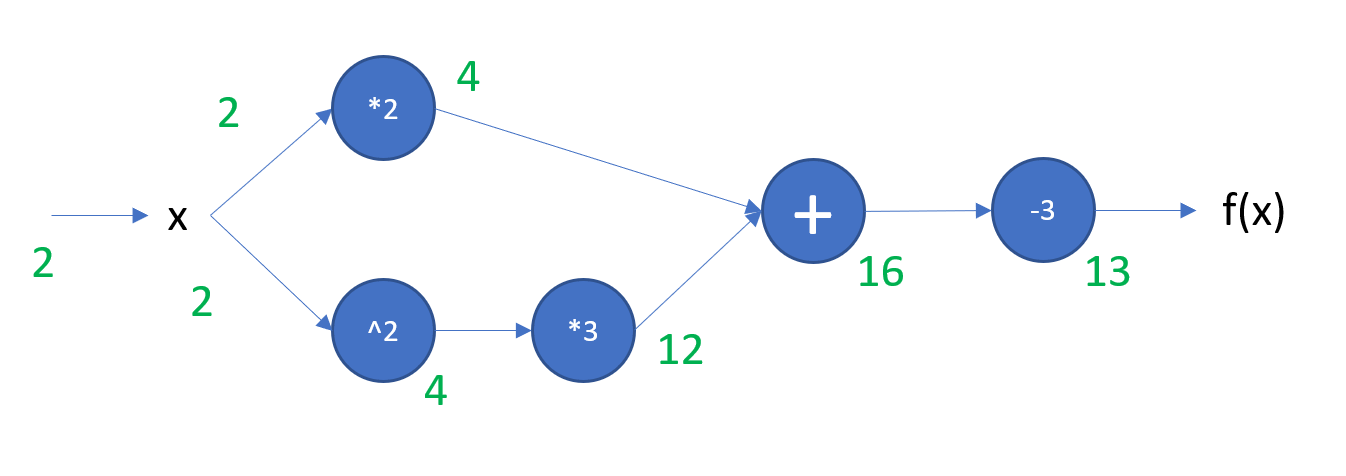

Al llamar a la función __t_f.backward()__, Pytorch ha propagado las derivadas hacia atrás en el grafo (utilizando la __regla de la cadena__ de las derivadas) para obtener la derivada de $f$ con respecto a $x$. Es lo que se conoce como retropropagación (*backpropagation*).

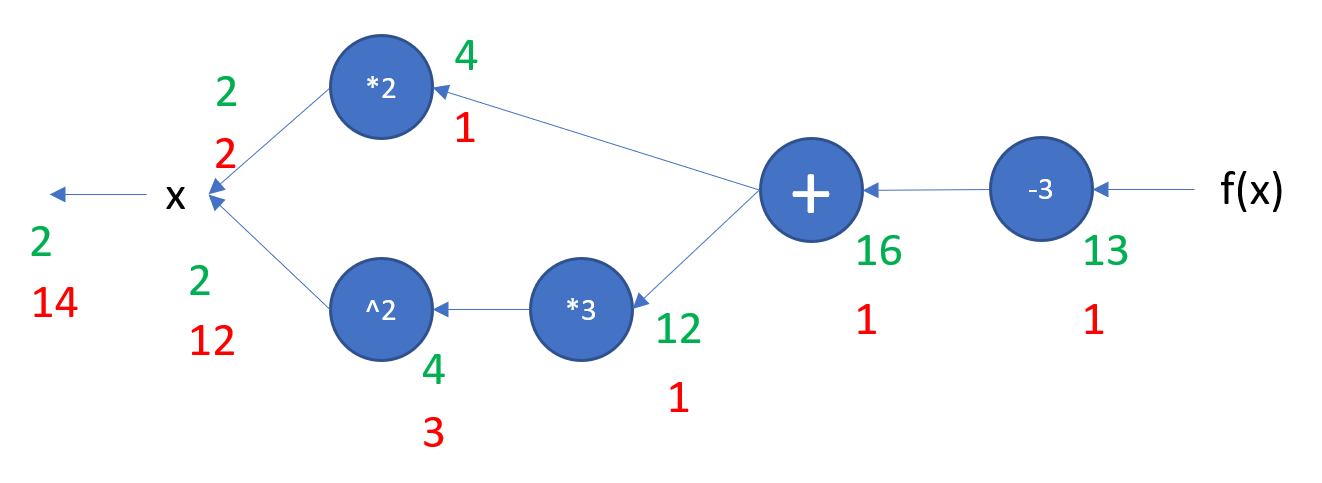

Podemos hacer lo mismo para la función $g$ que depende de $x$,$y$ y $z$:

In [ ]:
t_g = g(t_x, t_y, t_z)
t_g

Hemos calculado $g(2,-1,3) = 5*2*(-1) + 3*2^2 + 2*(-1) - (-1)*3 = 3$. Para generar las derivadas con respecto a *t_x* y a *t_y* llamamos a *t_g.backward()*. (nota: primero debemos borrar la derivada de la función anterior guardada en el tensor *t_x*).

In [ ]:
t_x.grad.zero_()
t_x.grad

In [ ]:
t_g.backward()
print(t_x.grad)
print(t_y.grad)

Comprobamos que es correcto. Hemos calculado:
 - $g_x(2,-1,3) = 5*(-1) + 6*2 = 7$
 - $g_y(2,-1,3) = 5*2 + 2 - 3 = 9$

Nota: como no hemos especificado 'requires_grad=True' para *t_z*, tenemos que:

In [ ]:
print(t_z.grad)

## ¿Por qué necesitamos derivadas?

El aprendizaje de una red neuronal consiste en la modificación iterativa de los parámetros para minimizar una función de pérdida que determina cuanto se ajustan nuestras predicciones a los datos. Para obtener las mejores predicciones, tenemos que encontrar los parámetros que minimicen la pérdida. 

En cada iteración, las derivadas nos indican en que dirección movernos para disminuir la pérdida. Una de las técnicas de entrenamiento mas sencillas es el optimizador Descenso del Gradiente Estocástico) que consiste simplemente en moverse en la dirección opuesta al gradiente (derivada).

Veamos un ejemplo con nuestra función $f(x) = 3x^2 + 2x -3$.

Primero inicializamos nuestro $x$ de partida con $x = 2$.

In [ ]:
t_x = torch.tensor(2, dtype=torch.float, requires_grad=True) # con derivada
lx1 = [] # Estas dos listas son para almacenar los valores por los que pasamos y dibujarlos
lf1 = []

Definimos la función p3 para que se vea la minimización de la pérdida

In [ ]:
x1_pl = np.arange(-3.5, 3, 0.05)
f1_pl = f(x1_pl)
def p3(l_x, l_f):
    
    plt.figure(figsize=(20,10))
    plt.plot(x1_pl, f1_pl, 'bo')
    plt.plot(l_x, l_f, 'r.-', markersize=20, linewidth=4)
    plt.show()

Ahora comenzamos a dar __pasos__ en la dirección del gradiente. En cada paso, calcularemos y dibujaremos el progreso hasta llegar a la convergencia.

En cada paso del proceso nos acercamos al mínimo de la función $f$, hasta que la mejora se hace casi imperceptible.

In [ ]:
for i in range(1,35):
    
    t_f = f(t_x) # hacemos el 'forward pass': generamos el grafo y calculamos el valor de f en nuestro punto x
    t_f.backward() # hacemos el 'backward pass': calculamos la derivada de f en nuestro punto x

    lx1.append(t_x.item()) # almacenamos los valores de x y f para dibujarlos
    lf1.append(t_f.item())

    print("iter={:}, x={:.3f}, f(x)={:.3f}, f'(x)={:.3f}".format(i, t_x.item(), t_f.item(), t_x.grad.item()))
    # imprimimos los valores de x, y, derivada 
    plt.clf()
    p3(lx1, lf1) # dibujamos el estado actual llamando a la función p3 que dibuja el gráfico añadiendo puntos (x,y)

    
    with torch.no_grad(): # para indicar a Pytorch que vamos a modificar una variable con requires_grad=True
        t_x -= 0.05*t_x.grad # damos un paso en la dirección del gradiente, multiplicado por un 'learning rate' de 0.05
        t_x.grad.zero_() # borramos el valor del gradiente para la siguiente iteración


Nota: El mínimo se produce cuando la derivada es cero. Se llega a este punto en la iteración 31 con esta <i>learning rate</i> (0,05).  En este punto la función $f(-1/3) = 3 (-2/3)^2 + 2(-2/3) - 3 = 10/3$